## Heart Disease Prediction
The database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

The dataset contains the following features:
1. age(in years)
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exploratory Data Analysis

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
#checking for null values
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

### Data Visualizations

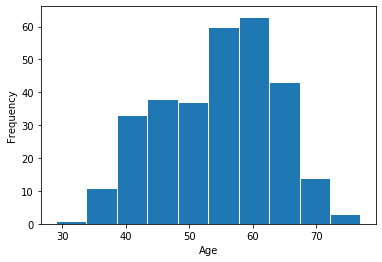

In [7]:
#distribution of age
plt.hist(df['age'],ec='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

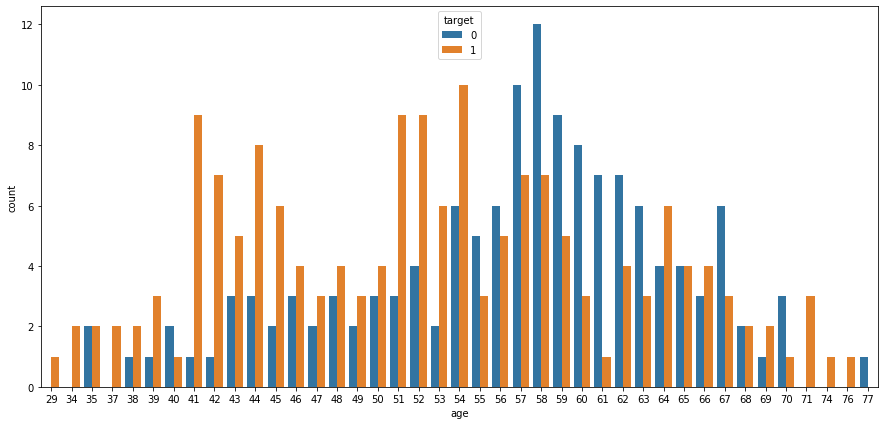

In [8]:
plt.figure(figsize=(15,7))
sns.countplot(df['age'],hue=df['target'])
plt.show()

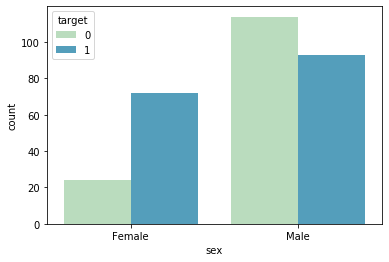

In [9]:
#count of genders
sns.countplot(df['sex'],hue=df['target'],palette='GnBu')
plt.xticks([0,1],['Female','Male'])
plt.show()

In [10]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

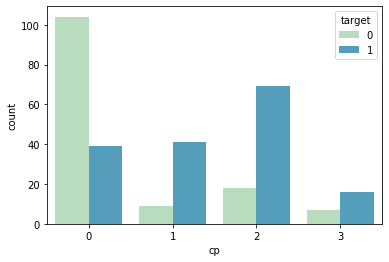

In [11]:
#count of chest pain type
sns.countplot(df['cp'],hue=df['target'],palette='GnBu')
plt.show()

In [12]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

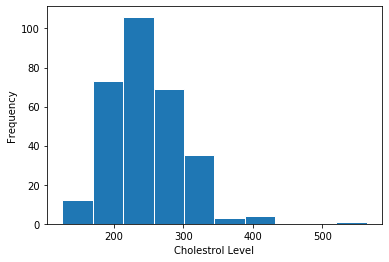

In [13]:
plt.hist(df['chol'],ec='white')
plt.xlabel('Cholestrol Level')
plt.ylabel('Frequency')
plt.show()

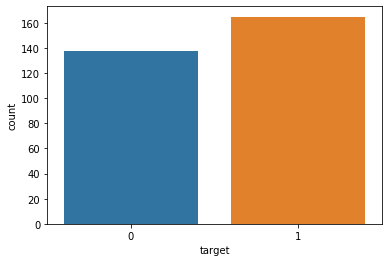

In [14]:
#patients with and without heart diseases
sns.countplot(df['target'])
plt.show()

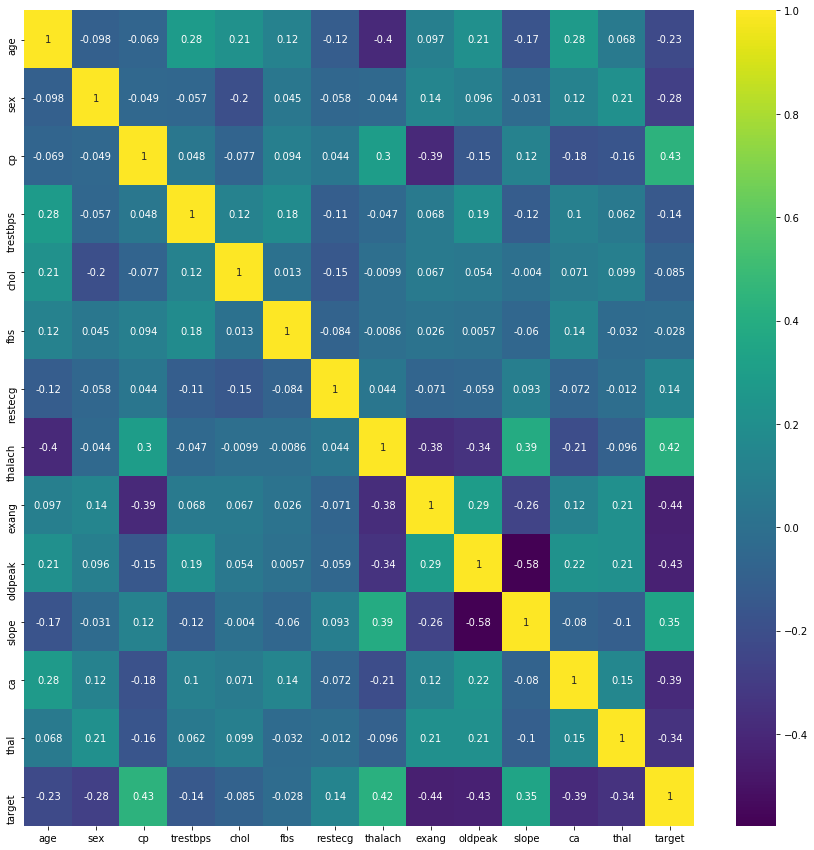

In [15]:
#plotting the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

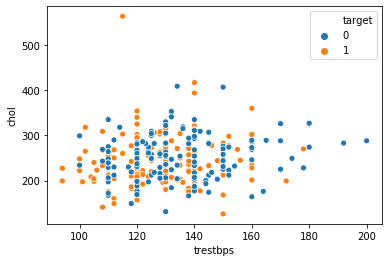

In [16]:
#scatter plot
sns.scatterplot(x='trestbps',y='chol',hue='target',data=df)
plt.show()

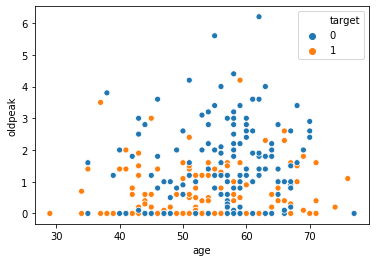

In [17]:
sns.scatterplot(x='age',y='oldpeak',hue='target',data=df)
plt.show()

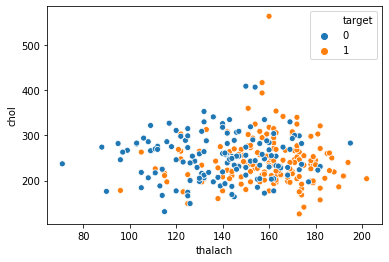

In [18]:
sns.scatterplot(x='thalach',y='chol',hue='target',data=df)
plt.show()

### Preparing the Dataset for predictions

In [19]:
#separating the feature and target vectors
x=df.drop('target',axis=1).values
y=df['target']
print(x.shape,y.shape)

(303, 13) (303,)


In [20]:
#importing standard scaler to scale the values of feature vector
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [21]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.3)
print(xtr.shape,xts.shape,ytr.shape,yts.shape)

(212, 13) (91, 13) (212,) (91,)


### Logistic Regression

In [22]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(max_iter=1000)
logr.fit(xtr,ytr)
ypr1=logr.predict(xts)

In [23]:
#libraries for evaluation
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix

In [24]:
print(accuracy_score(yts,ypr1))

0.8571428571428571


In [25]:
print(classification_report(yts,ypr1))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        43
           1       0.84      0.90      0.87        48

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91



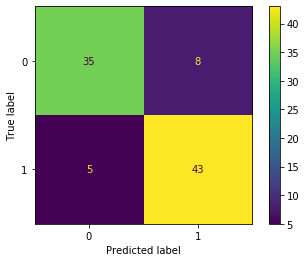

In [26]:
plot_confusion_matrix(logr,xts,yts)
plt.show()

### Decision Tree

In [27]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=6,random_state=42)
dt.fit(xtr,ytr)
ypr2=dt.predict(xts)

In [28]:
print(accuracy_score(yts,ypr2))

0.7472527472527473


In [29]:
print(classification_report(yts,ypr2))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74        43
           1       0.77      0.75      0.76        48

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



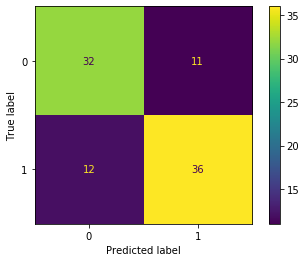

In [30]:
plot_confusion_matrix(dt,xts,yts)
plt.show()

### Random Forest

In [31]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(xtr,ytr)
ypr3=rf.predict(xts)

In [32]:
print(accuracy_score(yts,ypr3))

0.8131868131868132


In [33]:
print(classification_report(yts,ypr2))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74        43
           1       0.77      0.75      0.76        48

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



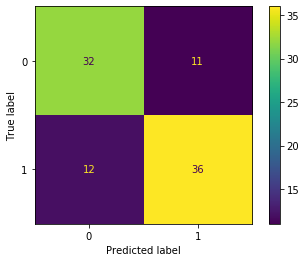

In [34]:
plot_confusion_matrix(dt,xts,yts)
plt.show()